In [4]:
#CLUSTERING - k Means clustering (UNSUPERVISED LEARNING)
#IN CLUSTERING THERE IS NO INITIALL OUPUT(y),only x is into consideration
#in K MEANS , K is no of clusters
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
#Divide data into input
#We will consider annual income and spending scord
x = df.iloc[:,3:5].values #values gives data in the form of array
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

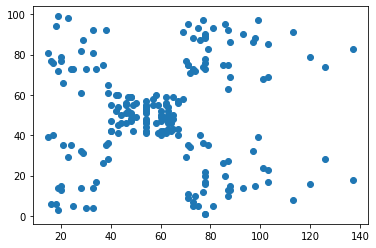

In [13]:
#Visualisation
import matplotlib.pyplot as plt
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
#so here we have only 1 cluster

In [14]:
import numpy as np
np.sqrt(200)
#are nimber of clusters should not exceed the sqrt of total number of points
#So our cluster number is in the range of 2 to 14

14.142135623730951

In [15]:
#now to find the value of k, we have got 2 methods
#1. ELBOW METHOD -slightly confusing
#2. SILHOUETTE SCORE METHOD - very accurate


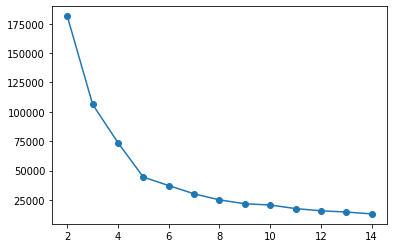

In [17]:
#1 . ELBOW METHOD
from sklearn.cluster import KMeans
k = range(2,15)
sse = [] #sum of squared Error , it is an empty list
#for i in range (2,15)
for i in k:
    model_demo = KMeans(n_clusters = i,random_state = 0) #random_state = 0 will make the values constant 
    model_demo.fit(x)
    sse.append(model_demo.inertia_)  #.inertia_ calculates the sse
plt.scatter(k,sse)
plt.plot(k,sse)
#CHECK AT WHICH POINT THE ELBOW GRAPH IS MORE PROMINANT  

In [18]:
#SO FROM ELBOW METHOD, LET US CONSIDER K = 5 AS TH MOST PROMINENT POINT

2 CLusters, Score = 0.2968969162503008
3 CLusters, Score = 0.46761358158775435
4 CLusters, Score = 0.4931963109249047
5 CLusters, Score = 0.553931997444648
6 CLusters, Score = 0.5379675585622219
7 CLusters, Score = 0.5264283703685728
8 CLusters, Score = 0.45704384633565154
9 CLusters, Score = 0.4563032021725485
10 CLusters, Score = 0.4492169169017592
11 CLusters, Score = 0.437104484577306
12 CLusters, Score = 0.42507724579994494
13 CLusters, Score = 0.4361876168478583
14 CLusters, Score = 0.40466460708668867


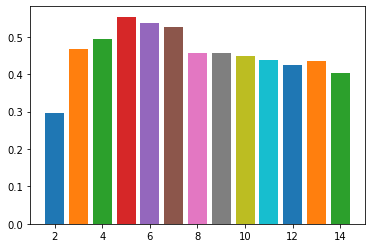

In [20]:
#SILHOUETTE SCORE METHOD
from sklearn.metrics import silhouette_score
k = range(2,15)
for i in k:
    model_demo = KMeans(n_clusters = i,random_state = 0)
    model_demo.fit(x)
    y_pred = model_demo.predict(x)
    print(f'{i} CLusters, Score = {silhouette_score(x,y_pred)}')
    plt.bar(i,silhouette_score(x,y_pred))

In [21]:
#after the silhouette score method , we have come to a conclusion that
#the number of clusters to be considered is 5

In [22]:
k = 5
from sklearn.cluster import KMeans
model = KMeans(n_clusters = k,random_state = 0)
model.fit(x)

KMeans(n_clusters=5, random_state=0)

In [23]:
#predict the output
y = model.predict(x)
y

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [24]:
y.size

200

In [25]:
np.unique(y,return_counts = True)

(array([0, 1, 2, 3, 4]), array([35, 81, 39, 22, 23], dtype=int64))

In [29]:
x[y == 1,1]
#The first '1' - cluster number, second '1' is the cloumn index number
#The value of input when cluster 1 is selected and column1 is selected

array([61, 55, 47, 42, 42, 52, 60, 54, 60, 45, 41, 50, 46, 51, 46, 56, 55,
       52, 59, 51, 59, 50, 48, 59, 47, 55, 42, 49, 56, 47, 54, 53, 48, 52,
       42, 51, 55, 41, 44, 57, 46, 58, 55, 60, 46, 55, 41, 49, 40, 42, 52,
       47, 50, 42, 49, 41, 48, 59, 55, 56, 42, 50, 46, 43, 48, 52, 54, 42,
       46, 48, 50, 43, 59, 43, 57, 56, 40, 58, 35, 34, 40], dtype=int64)

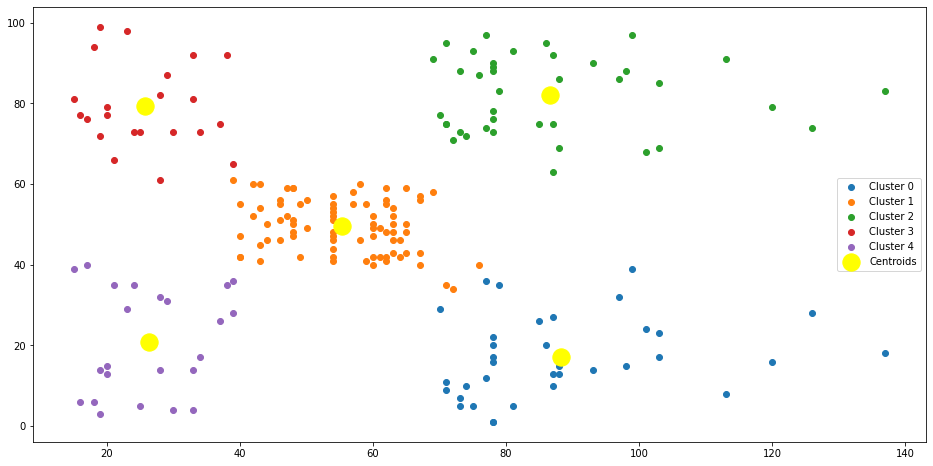

In [33]:
plt.figure(figsize = (16,8))
for i in range(k):
    plt.scatter(x[y == i,0],x[y == i,1],label = f'Cluster {i}')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s = 300,color = 'yellow',label = 'Centroids')
plt.legend()